In [20]:
#Importing important libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

**1. Data Preprocessing and Cleaning:** First of all, we read the data and remvove unnecessary variables like Name and CustomerID.Then, we checked if any null values were present our not. There are no null values in our data which means our data is clean. Then, we describe the  data to check for the presence of outliers.And then, we plotted different distributions to check for anomalies in our data. We aldo plotted churn with respect to differnt variables to see understand customer churning patterns.

In [21]:
#STEP 1a: Reading the excel file
df = pd.read_excel("customer_churn_large_dataset.xlsx")
df.sample(5)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
28215,28216,Customer_28216,67,Male,Chicago,21,32.96,303,1
18617,18618,Customer_18618,58,Male,Chicago,4,45.81,289,0
24194,24195,Customer_24195,33,Female,New York,17,38.16,151,0
67639,67640,Customer_67640,28,Female,New York,11,38.09,452,1
67694,67695,Customer_67695,55,Male,Los Angeles,2,70.14,289,1


In [22]:
#STEP 1b(i): Droping unnecesary columns and getting data info
df.drop(['CustomerID', 'Name'],axis='columns',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  int64  
 1   Gender                      100000 non-null  object 
 2   Location                    100000 non-null  object 
 3   Subscription_Length_Months  100000 non-null  int64  
 4   Monthly_Bill                100000 non-null  float64
 5   Total_Usage_GB              100000 non-null  int64  
 6   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 5.3+ MB


In [23]:
#We have already 100,000 non-null count in each case from df.info(), still we'll try to find percentage of missing values in each column 0f our dataframe,for our convenience

#STEP 1b(ii): Checking Null Values
df.isnull().sum()*100/df.shape[0]

#There are no null values in our data, so there's no need to drop any,as evident from the result

Age                           0.0
Gender                        0.0
Location                      0.0
Subscription_Length_Months    0.0
Monthly_Bill                  0.0
Total_Usage_GB                0.0
Churn                         0.0
dtype: float64

In [24]:
#STEP 1c: Describing the data to get idea about outliers
df.describe()


,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,44.027020,12.490100,65.053197,274.393650,0.497790
std,15.280283,6.926461,20.230696,130.463063,0.499998
min,18.000000,1.000000,30.000000,50.000000,0.000000
25%,31.000000,6.000000,47.540000,161.000000,0.000000
50%,44.000000,12.000000,65.010000,274.000000,0.000000
75%,57.000000,19.000000,82.640000,387.000000,1.000000
max,70.000000,24.000000,100.000000,500.000000,1.000000


From the values of maxima and minima in the above data description for the five variables, it evident that the values lie between
an acceptable and resonable range for these variables, and these are **'Age'[18,70], 'Subscriptions_Length_Months'[1,24], 'Monthly_Bil'[30,100], 'Total_Usage_GB'[50,500],
and 'Churn'[0,1]**.
The ranges are already within the expected domain for these attributes, which means that any values within these ranges are **not inherently outliers**. 

The presence of outliers might not be a significant concern if the ranges align with the context of our dataset and if the data follows a natural distribution. That's why we'll visualize our data using plots to get a better sense of the distribution and any potential anomalies or irregularities in the plots.

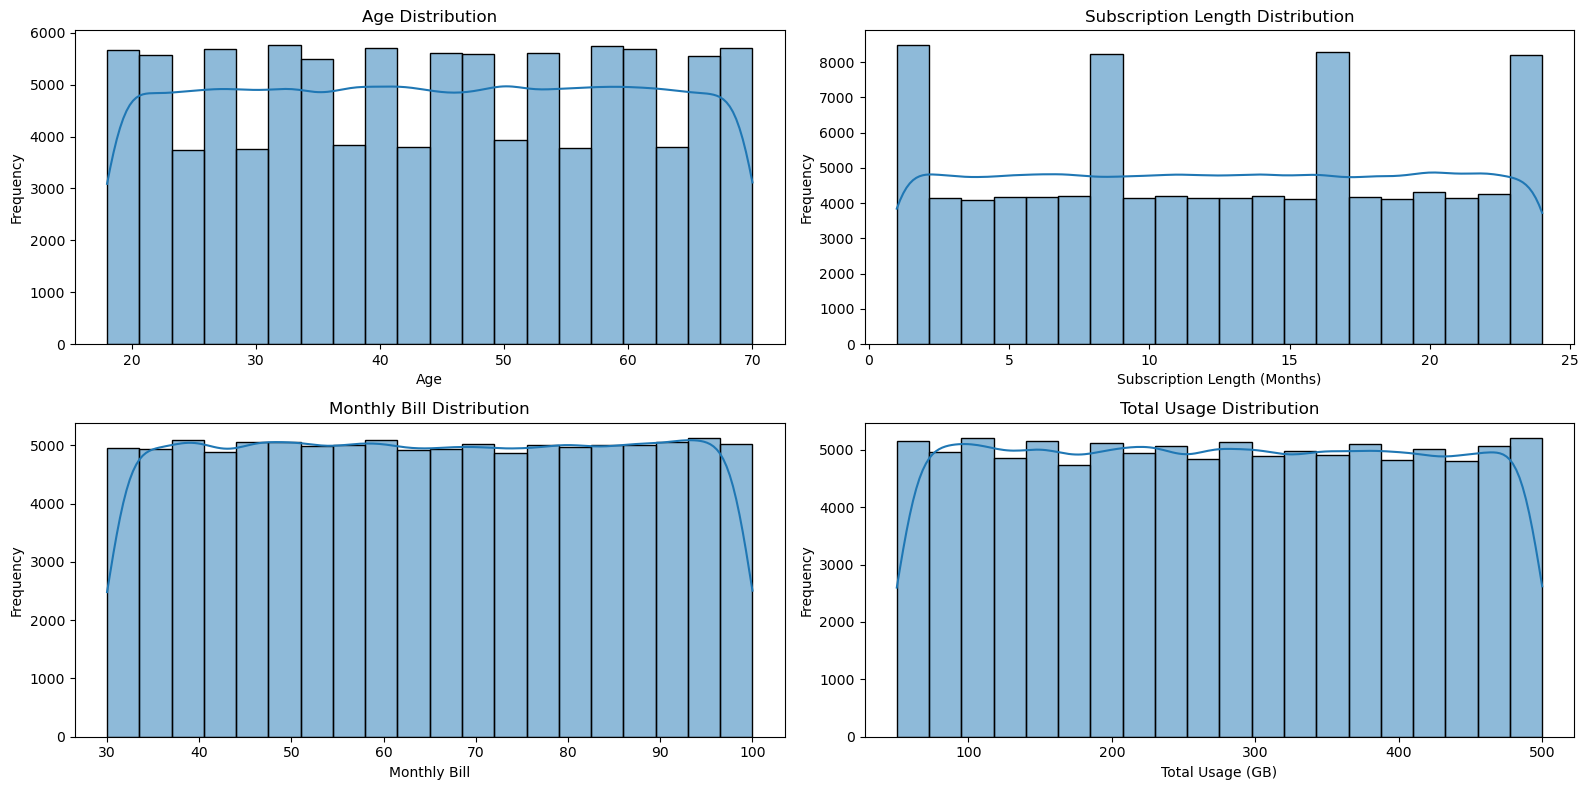

In [25]:
#STEP 1d: Exploring data distribution
plt.figure(figsize=(16,8))

# Age distribution
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.ylabel('Frequency')
plt.xlabel('Age')

# Subscription Length distribution
plt.subplot(2, 2, 2)
sns.histplot(df['Subscription_Length_Months'], bins=20, kde=True)
plt.title('Subscription Length Distribution')
plt.ylabel('Frequency')
plt.xlabel('Subscription Length (Months)')

# Monthly Bill distribution
plt.subplot(2, 2, 3)
sns.histplot(df['Monthly_Bill'], bins=20, kde=True)
plt.title('Monthly Bill Distribution')
plt.ylabel('Frequency')
plt.xlabel('Monthly Bill')

# Total Usage distribution
plt.subplot(2, 2, 4)
sns.histplot(df['Total_Usage_GB'], bins=20, kde=True)
plt.title('Total Usage Distribution')
plt.ylabel('Frequency')
plt.xlabel('Total Usage (GB)')

plt.tight_layout()
plt.show()

From the above visualization, we can say that for variables like **'Monthly_Bill', and 'Total_Usage_GB'** seem to have a relatively uniform distribution, meaning the data points are spread out relatively evenly across the range of values.
But for **'Age' and 'Subscription_Length_Months'**,there is increase in frequency at some intervals,to a fixed value.The histograms for 'Age' and 'Subscription_Length_Months' show two peaks,with one peak having a much higher frequency **around 5600-5700 for 'Age',** and **around 8000 for 'Subscription_Length_Months'**  and other being smaller aroud **3700-3800 for 'Age'** and **around 4000 for 'Subscription_Length_Months'**.


We have **two** dominant peaks in the distribution of **'Age' and 'Subscription_Length_Months'**, indicating the presence of two major clusters or segments in our data.
We can apply **K-Means clustering** to these variables to identify and label different segments based on their behaviors.By grouping customers with similar age or subscription patterns together, we can create a new feature that captures these behaviors.And in our **'feature engineering'** process, we'll include this feature from clustering,to capture and utilize these patterns, and enhance the overall effectiveness of our churn prediction model.



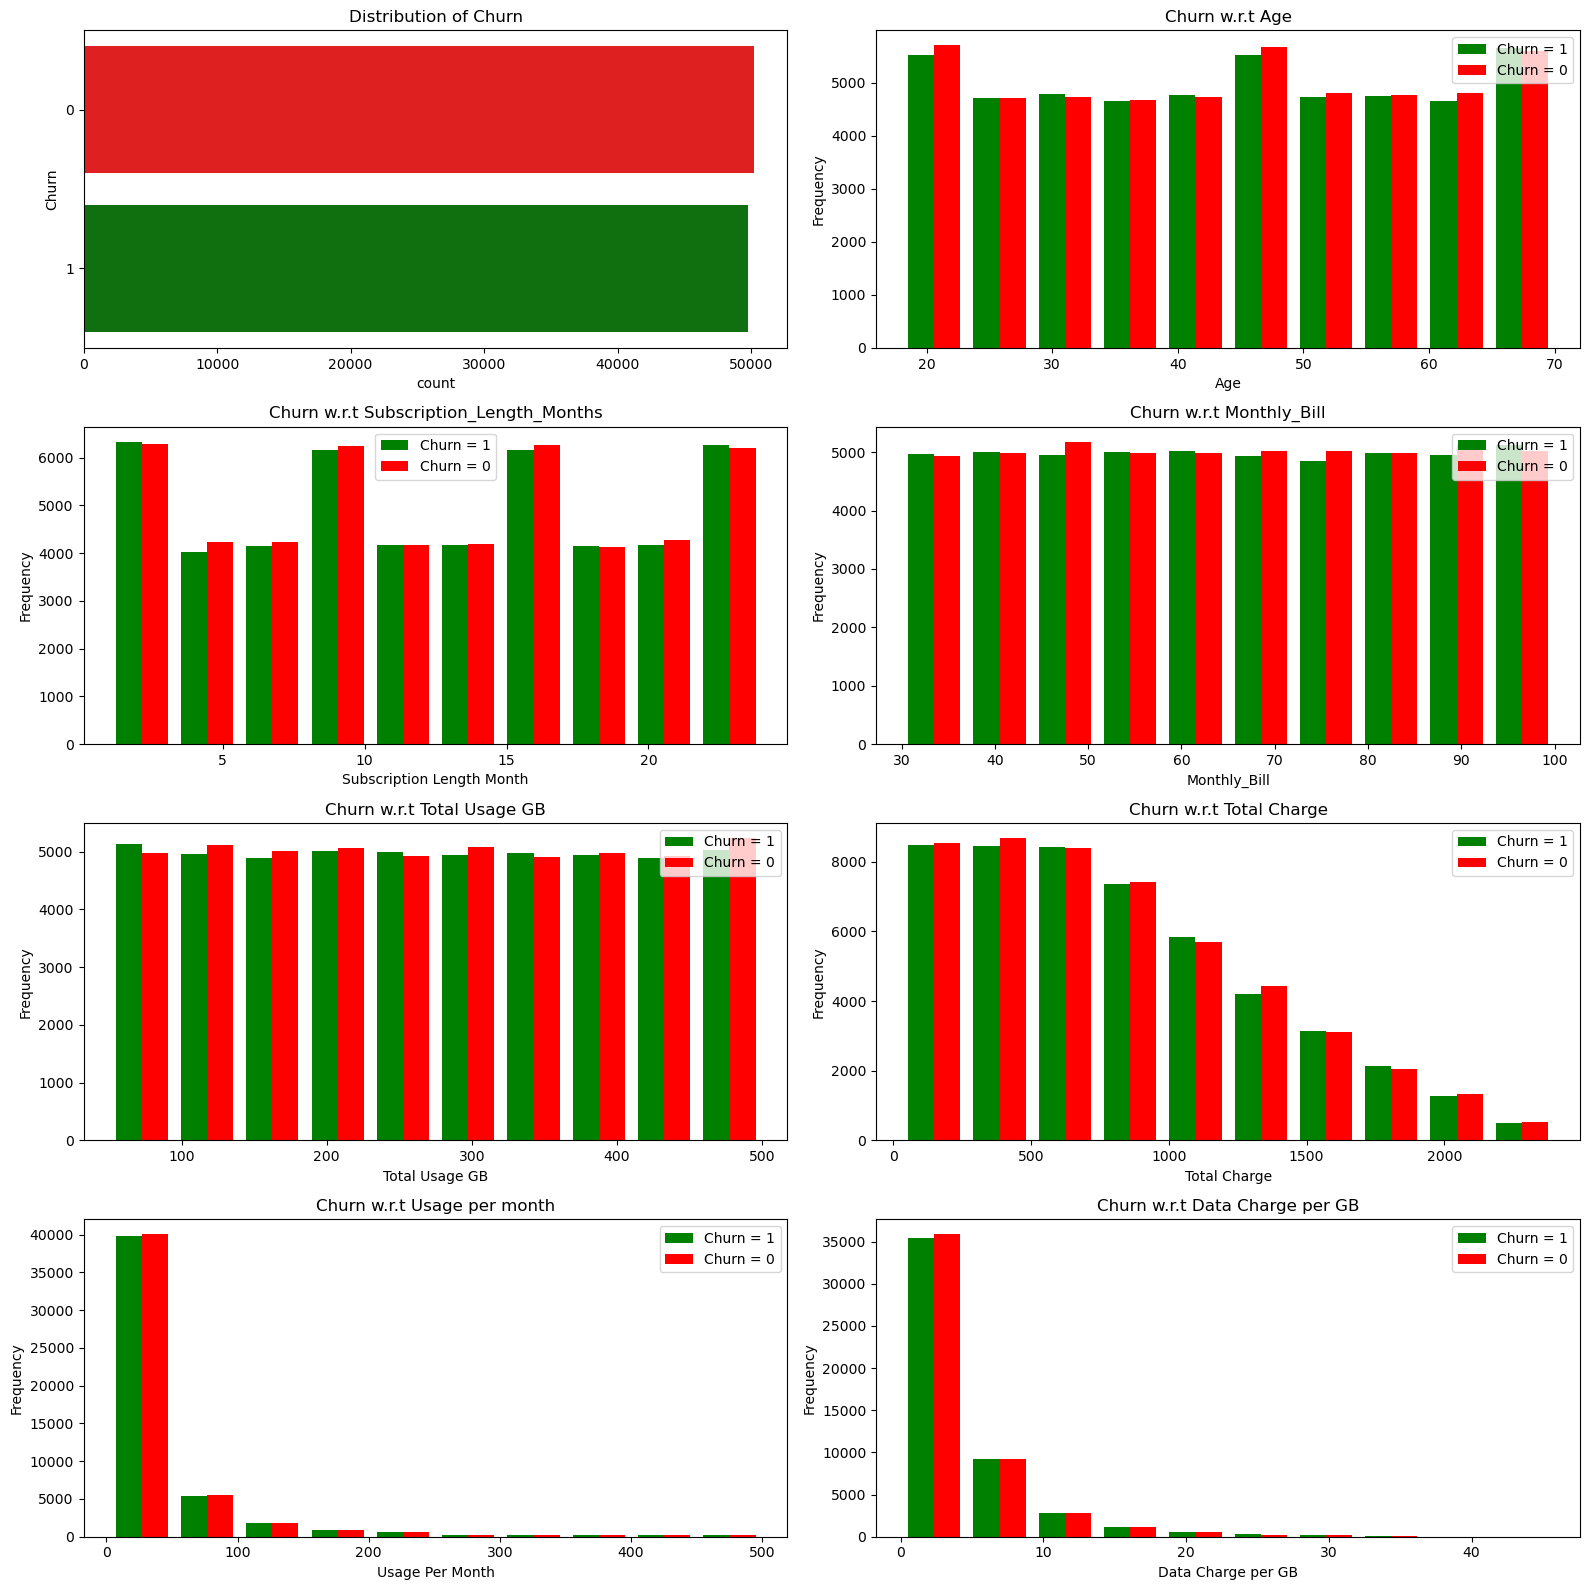

In [26]:
#STEP 1e: Exploring churning of customers with different variables, And observing churn trends with some introduced features
plt.figure(figsize=(16, 16))

# Distribution of Churn
plt.subplot(4, 2, 1)
colors = ['red', 'green']
sns.countplot(y='Churn', data=df, palette=colors)
plt.title('Distribution of Churn')
plt.ylabel('Churn')

# Plot Churn w.r.t Age
plt.subplot(4, 2, 2)
Age_for_churn = df[df.Churn == 1].Age
Age_for_not_churn = df[df.Churn == 0].Age
plt.hist([Age_for_churn, Age_for_not_churn], color=['green', 'red'], label=['Churn = 1', 'Churn = 0'])
plt.legend()
plt.title('Churn w.r.t Age')
plt.ylabel('Frequency')
plt.xlabel('Age')

# Plot Churn w.r.t Subscription_Length_Months
plt.subplot(4, 2, 3)
MonthLength_for_churn = df[df.Churn == 1].Subscription_Length_Months
MonthLength_for_not_churn = df[df.Churn == 0].Subscription_Length_Months
plt.hist([MonthLength_for_churn, MonthLength_for_not_churn], color=['green', 'red'], label=['Churn = 1', 'Churn = 0'])
plt.legend()
plt.title('Churn w.r.t Subscription_Length_Months')
plt.ylabel('Frequency')
plt.xlabel('Subscription Length Month')

# Plot Churn w.r.t Monthly Bill
plt.subplot(4, 2, 4)
MonthlyBill_for_churn = df[df.Churn == 1].Monthly_Bill
MonthlyBill_for_not_churn = df[df.Churn == 0].Monthly_Bill
plt.hist([MonthlyBill_for_churn, MonthlyBill_for_not_churn], color=['green', 'red'], label=['Churn = 1', 'Churn = 0'])
plt.legend()
plt.title('Churn w.r.t Monthly_Bill')
plt.ylabel('Frequency')
plt.xlabel('Monthly_Bill')

# Plot Churn w.r.t Total Usage GB
plt.subplot(4, 2, 5)
TotalUsageGB_for_churn = df[df.Churn == 1].Total_Usage_GB
TotalUsageGB_for_not_churn = df[df.Churn == 0].Total_Usage_GB
plt.hist([TotalUsageGB_for_churn, TotalUsageGB_for_not_churn], color=['green', 'red'], label=['Churn = 1', 'Churn = 0'])
plt.legend()
plt.title('Churn w.r.t Total Usage GB')
plt.ylabel('Frequency')
plt.xlabel('Total Usage GB')



# Plot Churn w.r.t Total Cost for given Months
plt.subplot(4, 2, 6)
df['Total_Charge'] = df['Monthly_Bill']*df['Subscription_Length_Months']
TotalCharge_for_churn = df[df.Churn == 1]['Total_Charge']
TotalCharge_for_not_churn = df[df.Churn == 0]['Total_Charge']
plt.hist([TotalCharge_for_churn, TotalCharge_for_not_churn], color=['green', 'red'], label=['Churn = 1', 'Churn = 0'])
plt.legend()
plt.title('Churn w.r.t Total Charge')
plt.ylabel('Frequency')
plt.xlabel('Total Charge')

# Plot Churn w.r.t Usage per month
plt.subplot(4, 2, 7)
df['Usage_Per_Month'] = df['Total_Usage_GB']/df['Subscription_Length_Months']
Usage_Per_Month_for_churn = df[df.Churn == 1]['Usage_Per_Month']
Usage_Per_Month_for_not_churn = df[df.Churn == 0]['Usage_Per_Month']
plt.hist([Usage_Per_Month_for_churn, Usage_Per_Month_for_not_churn], color=['green', 'red'], label=['Churn = 1', 'Churn = 0'])
plt.legend()
plt.title('Churn w.r.t Usage per month')
plt.ylabel('Frequency')
plt.xlabel('Usage Per Month')

# Plot Churn w.r.t Data Charge per GB
plt.subplot(4, 2, 8)
df['DataCharge_Per_GB']=df['Monthly_Bill']/df['Usage_Per_Month']
DataCharge_Per_GB_for_churn = df[df.Churn == 1]['DataCharge_Per_GB']
DataCharge_Per_GB_for_not_churn = df[df.Churn == 0]['DataCharge_Per_GB']
plt.hist([DataCharge_Per_GB_for_churn, DataCharge_Per_GB_for_not_churn], color=['green', 'red'], label=['Churn = 1', 'Churn = 0'])
plt.legend()
plt.title('Churn w.r.t Data Charge per GB')
plt.ylabel('Frequency')
plt.xlabel('Data Charge per GB')

plt.tight_layout()
plt.show()

In [27]:
#STEP 1f: Encoding categorical variables (Gender and Location) using One-Hot Encoding,as these variables are not ordinal and don't have natural order
df_encoded = pd.get_dummies(df, columns=['Gender', 'Location'], drop_first=True)

**2. Feature Engineering:** a. In first step, we introduced a new feture called,'Cluster'because of the two dominanat peaks utilzing KMeans Clustering. And that's why we have choosen 2 as the number of clusters.

b. Then ,we apllied MinMaxScaler to bring the entire data between [0,1] range, then we have done feature selection, selecting only those feature which helped increase our recall, and accuracy and found the currently included features in our input variable X to be the most appropriate. Then, we split the data into train and test data in a ratio of 8:2 respecctively, to train our model, then test it.

In [28]:
#Step 2a: Feature engineering with clustering
from sklearn.cluster import KMeans
features_for_clustering = df_encoded[['Age', 'Subscription_Length_Months']]
# Choosing the number of clusters based on the distinct peaks we observed
n_clusters = 2  # Two major segments indicated by the peaks
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(features_for_clustering)
df_encoded['Cluster'] = cluster_labels


c:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [31]:
#STEP 2b(i): Importing important  functions from sklearn library
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#STEP 2b(ii): Applying MinMaxScaler to the data
cols_to_scale = ['Age', 'Subscription_Length_Months', 'Monthly_Bill','Total_Usage_GB','Total_Charge','Usage_Per_Month','DataCharge_Per_GB']
scaler = MinMaxScaler()
df_encoded[cols_to_scale] = scaler.fit_transform(df_encoded[cols_to_scale])

#STEP 2b(iii): Data Splitting

X = df_encoded.drop(['Churn', 'Total_Usage_GB', 'Total_Charge'], axis='columns')
y = df_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**3. Model Building and Evaluation:** a. Here, we've utilized artificial nueral network as our machine learning algorithm because different algorithms like logistic regression , random forest regression, gave a recall less than 50 and almost similar accuracy so that was the last algorithm which seemed appropriate.First of all,though we knew the shape of our training data but we confirmed it to put the input shape in first layer of model architecture.

b. We defined the model architecture and compiled it using adam optimizer and binary_crossentropy as loss because of the binary nature of output,then we trained the model and predicted on the test data. And finally we evaluated the model performance using accuracy, precision, recall, F1-score.

In [33]:
#STEP 3a: Confirming the shape of input data
X_train.shape

(80000, 11)

In [34]:
#STEP 3b: Building the model

#STEP 3b(i): Importing important libraries to build and evaluate the model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#STEP 3b(i): Defining the model architecture
model = keras.Sequential([
    Dense(128, input_shape=(11,), activation='relu'),
    Dropout(0.3),  # Adding dropout for regularization
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

#STEP 3b(ii): Compiling the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#STEP 3b(iii): Training the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

#STEP 3b(iv): Predicting on the test data
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.49).astype(int)  # Applying threshold for binary classification

#STEP 3b(v): Calculating the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Epoch 1/100
2500/2500 [==============================] - 6s 2ms/step - loss: 0.6940 - accuracy: 0.4987 - val_loss: 0.6931 - val_accuracy: 0.5031
Epoch 2/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6933 - accuracy: 0.5011 - val_loss: 0.6932 - val_accuracy: 0.5044
Epoch 3/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6932 - accuracy: 0.5007 - val_loss: 0.6931 - val_accuracy: 0.5041
Epoch 4/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6932 - accuracy: 0.5025 - val_loss: 0.6931 - val_accuracy: 0.5039
Epoch 5/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6932 - accuracy: 0.5007 - val_loss: 0.6933 - val_accuracy: 0.5061
Epoch 6/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6932 - accuracy: 0.5004 - val_loss: 0.6931 - val_accuracy: 0.5053
Epoch 7/100
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6932 - accuracy: 0.5031 - val_loss: 0.6931 - val_ac

4. Model Optimization: We've tried to optimize model using Keras Tuner which is used to perform hyperparameter tuning for your Keras model. It searches for the best hyperparameters to optimize the F1 score.

In [36]:
from kerastuner.tuners import RandomSearch
from kerastuner import Objective  # Import the Objective class
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import Metric
import tensorflow.keras.backend as K
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a custom F1-score metric
class F1Score(Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.true_positives = self.add_weight(name='tp', initializer='zeros')
        self.false_positives = self.add_weight(name='fp', initializer='zeros')
        self.false_negatives = self.add_weight(name='fn', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = K.cast(y_true, 'bool')
        y_pred = K.cast(y_pred, 'bool')

        self.true_positives.assign_add(K.sum(K.cast(y_true & y_pred, self.dtype)))
        self.false_positives.assign_add(K.sum(K.cast(~y_true & y_pred, self.dtype)))
        self.false_negatives.assign_add(K.sum(K.cast(y_true & ~y_pred, self.dtype)))

    def result(self):
        precision = self.true_positives / (self.true_positives + self.false_positives + K.epsilon())
        recall = self.true_positives / (self.true_positives + self.false_negatives + K.epsilon())
        f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())
        return f1

# Define the model architecture
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=256, step=32),
                    input_shape=(11,),
                    activation='relu'))
    model.add(Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=128, step=32),
                    activation='relu'))
    model.add(Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', F1Score()])
    return model

objective = Objective(name='val_f1_score', direction='max')  # Use 'max' if you want to maximize the F1-score
tuner = RandomSearch(
    build_model,
    objective=objective,
    max_trials=10,
    directory='tuner_dir',
    project_name='churn_prediction'
)

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=100, validation_data=(X_test, y_test))
# Get the best model from the tuner
best_model = tuner.get_best_models(1)[0]

# Predict on test data with optimized model
y_pred_probs_optimized = best_model.predict(X_test)
y_pred_optimized = (y_pred_probs_optimized > 0.49).astype(int)

# Calculate evaluation metrics for optimized model
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
precision_optimized = precision_score(y_test, y_pred_optimized)
recall_optimized = recall_score(y_test, y_pred_optimized)
f1_optimized = f1_score(y_test, y_pred_optimized)

# Print the optimized evaluation metrics
print("Optimized Model Evaluation:")
print(f"Accuracy: {accuracy_optimized:.2f}")
print(f"Precision: {precision_optimized:.2f}")
print(f"Recall: {recall_optimized:.2f}")
print(f"F1-Score: {f1_optimized:.2f}")

INFO:tensorflow:Reloading Tuner from tuner_dir\churn_prediction\tuner0.json
INFO:tensorflow:Oracle triggered exit
625/625 [==============================] - 1s 1ms/step
Optimized Model Evaluation:
Accuracy: 0.50
Precision: 0.50
Recall: 0.70
F1-Score: 0.58
